In [2]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

Using TensorFlow backend.
C:\Users\haya\Anaconda3\envs\keras+tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\haya\Anaconda3\envs\keras+tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\haya\Anaconda3\envs\keras+tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\haya\Ana

In [3]:
batch_size=32
train_dir='D:/data/twitter_train/train/'
validation_dir='D:/data/twitter_train/val/'
file_name='vgg16_categorize_fine'

In [4]:
base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

In [5]:
n_categories=3
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

In [6]:
for layer in base_model.layers[:15]:
    layer.trainable=False
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________

In [7]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)



In [8]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [9]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [10]:
hist=model.fit_generator(train_generator,
                         epochs=200,
                         verbose=1,
                         validation_data=validation_generator,
                         steps_per_epoch=1,
                         validation_steps=1,
                         callbacks=[CSVLogger(file_name+'.csv')])

#save weights
model.save(file_name+'.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.1705 - acc: 0.3125 - val_loss: 1.2384 - val_acc: 0.2812
Epoch 2/200
1/1 [==============================] - 0s 287ms/step - loss: 1.2023 - acc: 0.4062 - val_loss: 1.1700 - val_acc: 0.3438
Epoch 3/200
1/1 [==============================] - 0s 280ms/step - loss: 1.1558 - acc: 0.3125 - val_loss: 1.1421 - val_acc: 0.3125
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 1.0846 - acc: 0.2500 - val_loss: 1.1044 - val_acc: 0.4167
Epoch 5/200
1/1 [==============================] - 0s 481ms/step - loss: 1.1228 - acc: 0.2812 - val_loss: 1.1358 - val_acc: 0.2812
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 1.0709 - acc: 0.4688 - val_loss: 1.1283 - val_acc: 0.3438
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 1.1688 - acc: 0.2812 - val_loss: 1.2118 - val_acc: 0.3438
E

Epoch 62/200
1/1 [==============================] - 1s 1s/step - loss: 0.9432 - acc: 0.8125 - val_loss: 0.9622 - val_acc: 0.7500
Epoch 63/200
1/1 [==============================] - 2s 2s/step - loss: 0.9980 - acc: 0.6562 - val_loss: 0.9287 - val_acc: 0.8438
Epoch 64/200
1/1 [==============================] - 1s 1s/step - loss: 0.9458 - acc: 0.8125 - val_loss: 1.0177 - val_acc: 0.5833
Epoch 65/200
1/1 [==============================] - 2s 2s/step - loss: 0.9344 - acc: 0.7188 - val_loss: 0.9786 - val_acc: 0.7188
Epoch 66/200
1/1 [==============================] - 1s 1s/step - loss: 0.9336 - acc: 0.7812 - val_loss: 0.9406 - val_acc: 0.7812
Epoch 67/200
1/1 [==============================] - 1s 1s/step - loss: 1.0076 - acc: 0.5625 - val_loss: 0.9805 - val_acc: 0.6562
Epoch 68/200
1/1 [==============================] - 1s 1s/step - loss: 0.9125 - acc: 0.7812 - val_loss: 0.9156 - val_acc: 0.7500
Epoch 69/200
1/1 [==============================] - 2s 2s/step - loss: 0.9288 - acc: 0.8438 - val

Epoch 126/200
1/1 [==============================] - 2s 2s/step - loss: 0.7653 - acc: 0.7500 - val_loss: 0.7336 - val_acc: 0.9375
Epoch 127/200
1/1 [==============================] - 1s 1s/step - loss: 0.7614 - acc: 0.8125 - val_loss: 0.7904 - val_acc: 0.7188
Epoch 128/200
1/1 [==============================] - 2s 2s/step - loss: 0.7489 - acc: 0.8125 - val_loss: 0.7883 - val_acc: 0.7917
Epoch 129/200
1/1 [==============================] - 1s 1s/step - loss: 0.7955 - acc: 0.7188 - val_loss: 0.7705 - val_acc: 0.8125
Epoch 130/200
1/1 [==============================] - 1s 1s/step - loss: 0.7386 - acc: 0.7812 - val_loss: 0.7619 - val_acc: 0.7500
Epoch 131/200
1/1 [==============================] - 2s 2s/step - loss: 0.7203 - acc: 0.8438 - val_loss: 0.7744 - val_acc: 0.8125
Epoch 132/200
1/1 [==============================] - 1s 1s/step - loss: 0.7985 - acc: 0.7500 - val_loss: 0.8216 - val_acc: 0.7083
Epoch 133/200
1/1 [==============================] - 2s 2s/step - loss: 0.6638 - acc: 0.93

1/1 [==============================] - 1s 1s/step - loss: 0.5901 - acc: 0.7812 - val_loss: 0.6395 - val_acc: 0.7500
Epoch 190/200
1/1 [==============================] - 2s 2s/step - loss: 0.5581 - acc: 0.8125 - val_loss: 0.6339 - val_acc: 0.7500
Epoch 191/200
1/1 [==============================] - 1s 1s/step - loss: 0.6326 - acc: 0.7188 - val_loss: 0.5549 - val_acc: 0.8750
Epoch 192/200
1/1 [==============================] - 1s 1s/step - loss: 0.5664 - acc: 0.9062 - val_loss: 0.5403 - val_acc: 0.7500
Epoch 193/200
1/1 [==============================] - 1s 1s/step - loss: 0.5719 - acc: 0.8438 - val_loss: 0.4846 - val_acc: 0.9375
Epoch 194/200
1/1 [==============================] - 1s 1s/step - loss: 0.5612 - acc: 0.8438 - val_loss: 0.5874 - val_acc: 0.7812
Epoch 195/200
1/1 [==============================] - 1s 1s/step - loss: 0.5897 - acc: 0.8125 - val_loss: 0.6917 - val_acc: 0.6875
Epoch 196/200
1/1 [==============================] - 1s 1s/step - loss: 0.4660 - acc: 0.9062 - val_loss:

In [23]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

batch_size=32
test_dir='D:/data/twitter_train/val/'
display_dir='madoka_magica_images/display'

train_dir='D:/data/twitter_train/train/'
file_name='vgg16_categorize_fine'

label=['illust','screen','picture']

#load model and weights
# json_string=open(file_name+'.json').read()
# model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score=model.evaluate_generator(test_generator, steps=1)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])


Found 120 images belonging to 3 classes.

 test loss: 0.5639540553092957

 test_acc: 0.84375


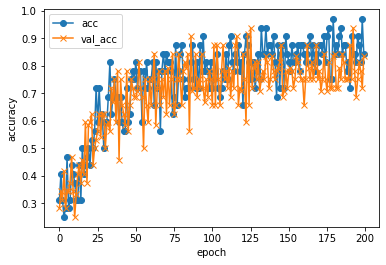

In [24]:
import matplotlib.pyplot as plt

#acc, val_accのプロット
plt.plot(hist.history["acc"], label="acc", ls="-", marker="o")
plt.plot(hist.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
#Final.pngという名前で、結果を保存
plt.savefig('Final.png')
plt.show()

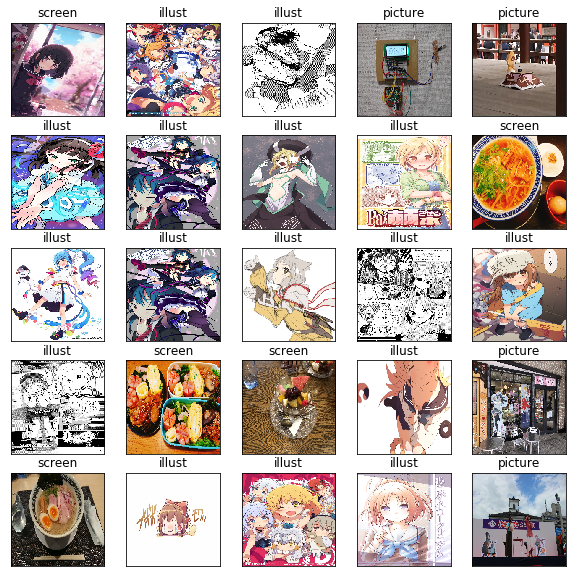

In [26]:
from keras.preprocessing.image import img_to_array, load_img
display_dir='D:/data/twitter_train/test/'
#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(10,10))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])


plt.show()